# Plot function reverse engineering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def gen_array_lr(n_samples = 20, noise_std = 1,  slope = 2.0, bias = 5):
    arr1 = np.random.uniform(0,10, n_samples)
    arr2 = arr1 *slope + bias + np.random.normal(0, noise_std, n_samples)
    return np.column_stack((arr1, arr2))

In [88]:
def visualize_dataset(dataset, model=None):
    """
    Visualize dataset with optional regression line.
    
    Parameters:
    - dataset: NumPy array with rows [X, y]
    - model: PySpark LinearRegressionModel (optional)
    """
    X = dataset[:, 0]
    y = dataset[:, 1]
    
    plt.scatter(X, y, color="blue", alpha=0.6, label="Data points")
    
    # If model is provided, plot regression line
    if model is not None:
        y_pred = model.coefficients[0] * X + model.intercept
        plt.plot(X, y_pred, color="red", linewidth=2, label=f'Regression Line: y = {model.coefficients[0]:.2f}x + {model.intercept:.2f}')
        # plt.plot(X, y_pred, color='red', linewidth=2, 
        #      label=f'Regression Line: y = {coefficients[0]:.2f}x + {intercept:.2f}')
    
    plt.xlabel("X (feature)")
    plt.ylabel("y (target)")
    #plt.title("Linear Regression Visualization")
    plt.legend()
    plt.show()

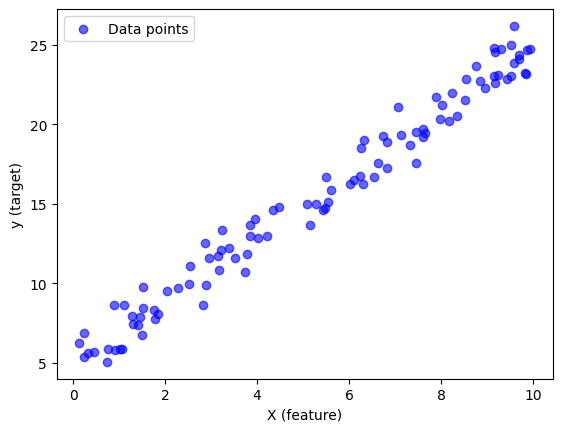

In [6]:
myarr = gen_array_lr(100)
visualize_dataset(myarr)

In [85]:
#myarr

In [8]:
myarr[0]

array([ 2.53010626, 11.09820259])

In [11]:
# for i in myarr:
#     print(i[0])
#     print(i[1])

In [12]:
X = myarr[:, 0]

In [86]:
#X

In [16]:
y = myarr[:, 1]

In [87]:
#y

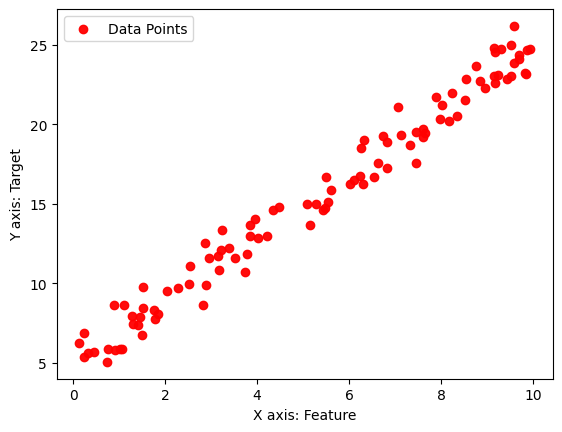

In [44]:
 #plt.scatter(X, y, color="blue", alpha=0.6, label="Data points")
plt.scatter(X, y, color='red', alpha=0.95, label="Data Points")
plt.legend()
plt.xlabel("X axis: Feature")
plt.ylabel("Y axis: Target")
plt.show()

In [45]:
def visualize_data(datset):
    X = datset[:, 0]
    y = datset[:, 1]
    plt.scatter(X, y, color='red', alpha=0.95, label="Data Points")
    plt.legend()
    plt.xlabel("X axis: Feature")
    plt.ylabel("Y axis: Target")
    plt.show()

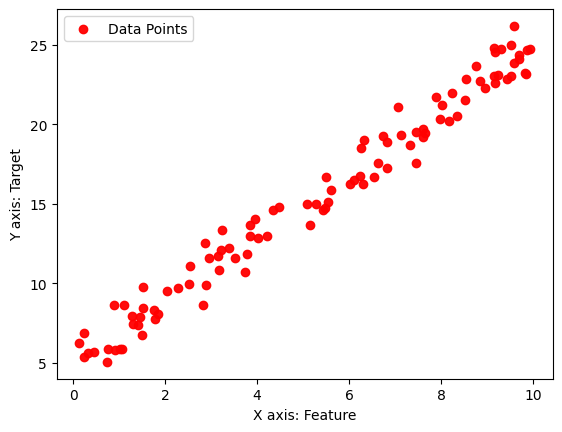

In [46]:
visualize_data(myarr)

In [47]:
from pyspark.sql import SparkSession, Row
from pyspark.ml.linalg import Vectors
from pyspark.ml.regression import LinearRegression

In [48]:
import findspark
findspark.init(r"C:\python311\Lib\site-packages\pyspark")

In [51]:
#help(SparkSession)

In [53]:
def data1(data_function, **kwargs):
    print("Data function")
    print(data_function)
    print("*"*80)
    print("KWargs")
    print(kwargs)

In [89]:
# -------------------------------
# Function 3: Fit PySpark model and visualize
# -------------------------------
def fit_model_pyspark(data_function, **kwargs):
    """
    Fit a PySpark LinearRegression model on dataset generated by data_function.
    Automatically calls visualization.
    
    Parameters:
    - data_function: function that generates dataset (e.g., generate_linear_dataset)
    - kwargs: arguments passed to data_function
    
    Returns:
    - model: Trained PySpark LinearRegressionModel
    """
    # print("Data function")
    # print(data_function)
    # print("*"*80)
    # print("KWargs")
    # print(kwargs)
    # Step 1: Generate dataset by calling the function
    dataset = data_function(**kwargs)
    #print(dataset)
    # # Step 2: Initialize Spark
    spark = SparkSession.builder.appName("tutorials").getOrCreate()
    #"This is a builder pattern object lets you configure how Pyspark should start"
    #This is a builder patter object that lets you configure how spark should start. 
    #appname, master,
    print(type(spark))
    
    # # Step 3: Convert NumPy dataset into Spark DataFrame
    data = [Row(features=Vectors.dense([float(x)]), label=float(y)) for x, y in dataset]
    #print(data)
    df = spark.createDataFrame(data)
    #print(df.show(5))
    
    # # Step 4: Fit PySpark Linear Regression
    lr = LinearRegression(featuresCol="features", labelCol="label")
    model = lr.fit(df)
    
    # # Step 5: Visualize results (calls Function 2)
    visualize_dataset(dataset, model)
    print(model)
    
    return model

<class 'pyspark.sql.session.SparkSession'>


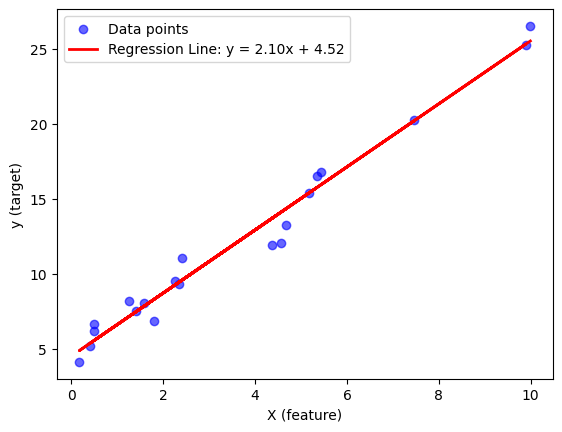

LinearRegressionModel: uid=LinearRegression_d738b003d4ba, numFeatures=1


LinearRegressionModel: uid=LinearRegression_d738b003d4ba, numFeatures=1

In [90]:
fit_model_pyspark(gen_array_lr)